# Importando coisas

In [50]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Declarando variáveis

In [51]:
buff_max = 60     #
buff_danger = 5   #
N2 = 0.25         # Reduzir
N1 = 0.5          # Reduzir pouco
Z = 1             # Não alterar
P1 = 1.5          # Aumentar pouco
P2 = 2            # Aumentar

# Declarando antecedentes e consequentes (universos)

In [52]:
buff_size = ctrl.Antecedent(np.arange(0, buff_max+0.1, 0.1), 'buff_size')
# print(np.arange(0, 3*T/4+0.5, 0.5))

buff_size_diff = ctrl.Antecedent(np.arange(-3, 3.1, 0.1), 'buff_size_diff')
# print(np.arange(-3, 4, 1))

rate = ctrl.Antecedent(np.arange(0, 2.6, 0.1), 'rate')
# print(np.arange(0, 2.2, 0.2))

factor = ctrl.Consequent(np.arange(0, P2 + 0.55, 0.05), 'factor')
# print(np.arange(0, 2.05, 0.05))

# Montando membership functions + vendo resultados

C:\Users\theca\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\theca\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\theca\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\theca\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a n

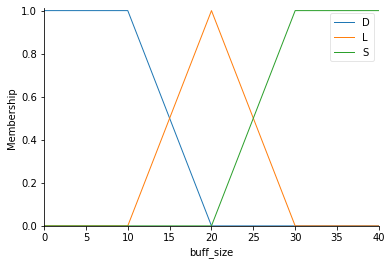

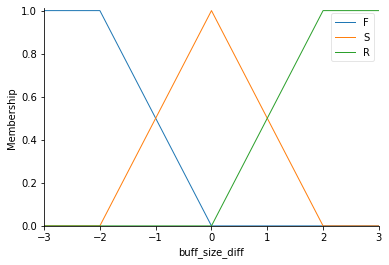

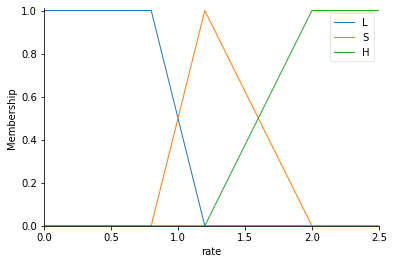

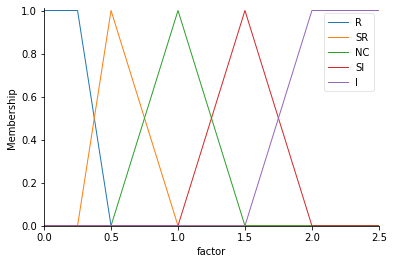

In [53]:
# Buffer Size - dangerous, low, safe
buff_size['D'] = fuzz.trapmf(buff_size.universe, [0, 0, buff_danger, buff_max/2])
buff_size['L'] = fuzz.trimf(buff_size.universe, [buff_danger, buff_max/2, 3*buff_max/4])
buff_size['S'] = fuzz.trapmf(buff_size.universe, [buff_max/2, 3*buff_max/4, np.inf, np.inf])

# Diferencial do Buffer Sizer - falling, steady, rising
buff_size_diff['F'] = fuzz.trapmf(buff_size_diff.universe, [-3, -3, -2, 0])
buff_size_diff['S'] = fuzz.trimf(buff_size_diff.universe, [-2, 0, 2])
buff_size_diff['R'] = fuzz.trapmf(buff_size_diff.universe, [0, 2, np.inf, np.inf])

# Taxa de bits - low, steady, high
rate['L'] = fuzz.trapmf(rate.universe, [0, 0, 0.8, 1.2])
rate['S'] = fuzz.trimf(rate.universe, [0.8, 1.2, 2])
rate['H'] = fuzz.trapmf(rate.universe, [1.2, 2, np.inf, np.inf])

# Fator de incremento/decremento da qualidade do próximo segmento
factor['R'] = fuzz.trapmf(factor.universe, [0, 0, N2, N1])
factor['SR'] = fuzz.trimf(factor.universe, [N2, N1, Z])
factor['NC'] = fuzz.trimf(factor.universe, [N1, Z, P1])
factor['SI'] = fuzz.trimf(factor.universe, [Z, P1, P2])
factor['I'] = fuzz.trapmf(factor.universe, [P1, P2, np.inf, np.inf])

buff_size.view()
buff_size_diff.view()
rate.view()
factor.view()

# Montando regras

In [54]:
# Buffer Dangerous
rule1 = ctrl.Rule(buff_size['D'] & buff_size_diff['F'] & rate['L'], factor['R'])
rule2 = ctrl.Rule(buff_size['D'] & buff_size_diff['F'] & rate['S'], factor['R'])
rule3 = ctrl.Rule(buff_size['D'] & buff_size_diff['F'] & rate['H'], factor['R'])

rule4 = ctrl.Rule(buff_size['D'] & buff_size_diff['S'] & rate['L'], factor['R'])
rule5 = ctrl.Rule(buff_size['D'] & buff_size_diff['S'] & rate['S'], factor['SR'])
rule6 = ctrl.Rule(buff_size['D'] & buff_size_diff['S'] & rate['H'], factor['SR'])

rule7 = ctrl.Rule(buff_size['D'] & buff_size_diff['R'] & rate['L'], factor['R'])
rule8 = ctrl.Rule(buff_size['D'] & buff_size_diff['R'] & rate['S'], factor['SR'])
rule9 = ctrl.Rule(buff_size['D'] & buff_size_diff['R'] & rate['H'], factor['SR'])

# Buffer Low
rule10 = ctrl.Rule(buff_size['L'] & buff_size_diff['F'] & rate['L'], factor['SR'])
rule11 = ctrl.Rule(buff_size['L'] & buff_size_diff['F'] & rate['S'], factor['NC'])
rule12 = ctrl.Rule(buff_size['L'] & buff_size_diff['F'] & rate['H'], factor['NC'])

rule13 = ctrl.Rule(buff_size['L'] & buff_size_diff['S'] & rate['L'], factor['NC'])
rule14 = ctrl.Rule(buff_size['L'] & buff_size_diff['S'] & rate['S'], factor['NC'])
rule15 = ctrl.Rule(buff_size['L'] & buff_size_diff['S'] & rate['H'], factor['NC'])

rule16 = ctrl.Rule(buff_size['L'] & buff_size_diff['R'] & rate['L'], factor['NC'])
rule17 = ctrl.Rule(buff_size['L'] & buff_size_diff['R'] & rate['S'], factor['NC'])
rule18 = ctrl.Rule(buff_size['L'] & buff_size_diff['R'] & rate['H'], factor['SI'])

# Buffer Safe
rule19 = ctrl.Rule(buff_size['S'] & buff_size_diff['F'] & rate['L'], factor['SI'])
rule20 = ctrl.Rule(buff_size['S'] & buff_size_diff['F'] & rate['S'], factor['SI'])
rule21 = ctrl.Rule(buff_size['S'] & buff_size_diff['F'] & rate['H'], factor['I'])

rule22 = ctrl.Rule(buff_size['S'] & buff_size_diff['S'] & rate['L'], factor['SI'])
rule23 = ctrl.Rule(buff_size['S'] & buff_size_diff['S'] & rate['S'], factor['SI'])
rule24 = ctrl.Rule(buff_size['S'] & buff_size_diff['S'] & rate['H'], factor['I'])

rule25 = ctrl.Rule(buff_size['S'] & buff_size_diff['R'] & rate['H'], factor['I'])
rule26 = ctrl.Rule(buff_size['S'] & buff_size_diff['R'] & rate['H'], factor['I'])

rules = [
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
    rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18,
    rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26
]

## Declarando/Configurando o sistema de controle

In [55]:
FDASHControl = ctrl.ControlSystem(rules)
FDASH = ctrl.ControlSystemSimulation(FDASHControl)

## Calculando saída/mostrando exemplo

Output: fator de acréscimo/decréscimo = 0.8455882352941179


C:\Users\theca\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


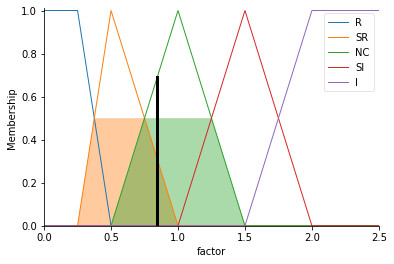

In [56]:
FDASH.input['buff_size'] = 20
FDASH.input['buff_size_diff'] = -20
FDASH.input['rate'] = 1

FDASH.compute()

output = FDASH.output['factor']
print("Output: fator de acréscimo/decréscimo =", output)
factor.view(sim=FDASH)